In [1]:
import collections
import numpy as np
import gym

from keras.layers import Dense, Flatten, Activation, Input, Lambda
from keras.models import Sequential, Model
from keras.optimizers import Adam

from rl.agents import SARSAAgent
from rl.agents.dqn import mean_q

from rl.callbacks import TrainEpisodeLogger
from rl.policy import EpsGreedyQPolicy, GreedyQPolicy, BoltzmannQPolicy, MaxBoltzmannQPolicy

from keras.utils import plot_model
import keras.backend as K

/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/tensorflow/__init__.py:29: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils as _distutils
/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/flatbuffers/compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/keras/utils/image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
/home/wasf84/Documentos/pgmc

In [7]:
#Setting up the environment
env = gym.make('MountainCar-v0')

seed_val = 261
env.seed(seed_val)
np.random.seed(seed_val)

# tive de fazer essa mutreta para poder rodar em multithread
# se colocar um '_max_episode_steps' MENOR que 'max_steps', dá problema com truncamento no método 'sarsa.fit'
# pesquisando na internet descobri que é por causa exatamente da otimização do código para rodar em multithread
# não entendi bem porque isso, não achei alguém explicando exatamente o problema, apenas falando como resolveu
max_steps=50000
env._max_episode_steps = max_steps

#Getting the state and action space
states = env.observation_space.shape[0]
#print(env.observation_space.shape[0])
actions = env.action_space.n
#print(env.action_space.n)

#Defining a Neural Network function for our MountainCar agent
'''def create_model(states, actions):
    """Creating a simple Deep Neural Network."""
    model = Sequential()
    model.add(Flatten(input_shape = (1, states)))
    model.add(Dense(30, activation='swish'))
    model.add(Dense(30, activation='swish'))
    model.add(Dense(actions, activation='linear'))
    return model'''

'def create_model(states, actions):\n    """Creating a simple Deep Neural Network."""\n    model = Sequential()\n    model.add(Flatten(input_shape = (1, states)))\n    model.add(Dense(30, activation=\'swish\'))\n    model.add(Dense(30, activation=\'swish\'))\n    model.add(Dense(actions, activation=\'linear\'))\n    return model'

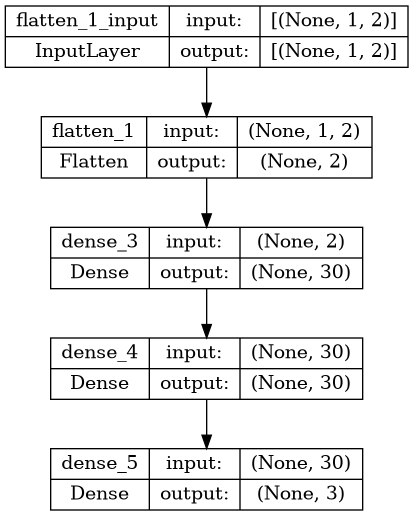

In [8]:
model = Sequential()
model.add(Flatten(input_shape = (1, states)))
model.add(Dense(30, activation='swish'))
model.add(Dense(30, activation='swish'))
model.add(Dense(actions, activation='linear'))

plot_model(model, show_shapes=True) # to_file=dot_img_file,

In [9]:
#Getting our neural network
#model = create_model(states, actions)

#Defining SARSA Keras-RL agent: inputing the policy and the model
sarsa = SARSAAgent(model=model, nb_actions=actions, policy=MaxBoltzmannQPolicy())

#Compiling SARSA with mean squared error loss
sarsa.compile('adam', metrics=["mse"])

#Training the agent for max_steps steps
sarsa.fit(env, nb_steps=max_steps, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 12:08 - reward: -1.0000

/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-09-01 18:00:54.921313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-01 18:00:54.928991: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


10000/10000 [==============================] - 35s 3ms/step - reward: -1.0000
2 episodes - episode_reward: -2840.000 [-4583.000, -1097.000] - loss: 0.662 - mse: 6337.456 - mean_q: -90.720

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 37s 4ms/step - reward: -1.0000
Interval 3 (20000 steps performed)
10000/10000 [==============================] - 35s 4ms/step - reward: -1.0000
Interval 4 (30000 steps performed)
10000/10000 [==============================] - 35s 4ms/step - reward: -1.0000
2 episodes - episode_reward: -15475.500 [-25491.000, -5460.000] - loss: 0.529 - mse: 7392.341 - mean_q: -98.166

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 35s 3ms/step - reward: -1.0000
done, took 176.244 seconds


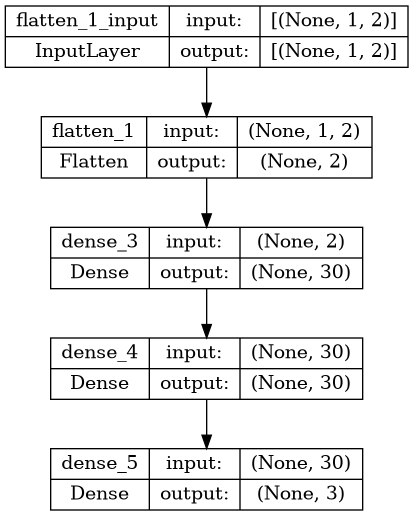

In [10]:
plot_model(model, show_shapes=True)

In [11]:
#Fitting and testing our agent model for 200 episodes
scores = sarsa.test(env, nb_episodes = 200, visualize = False)

Testing for 200 episodes ...
Episode 1: reward: -50000.000, steps: 50000
Episode 2: reward: -50000.000, steps: 50000
Episode 3: reward: -50000.000, steps: 50000
Episode 4: reward: -50000.000, steps: 50000
Episode 5: reward: -50000.000, steps: 50000
Episode 6: reward: -50000.000, steps: 50000
Episode 7: reward: -50000.000, steps: 50000
Episode 8: reward: -50000.000, steps: 50000
Episode 9: reward: -50000.000, steps: 50000
Episode 10: reward: -50000.000, steps: 50000
Episode 11: reward: -50000.000, steps: 50000
Episode 12: reward: -50000.000, steps: 50000
Episode 13: reward: -50000.000, steps: 50000



KeyboardInterrupt

